# **Taylor Series in Python**

## **Taylor Series in Python**

### **e^x**

**Code the Taylor Series by writing out each term individually**

In [ ]:
import math

x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_2)

7.0


In [ ]:
print(math.exp(2))

7.38905609893065


**Use a for loop to calculate a Taylor Series**

In [ ]:
import math

x = 2
e_to_2 = 0
for i in range(10):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.3887125220458545


In [ ]:
print(math.exp(2))

7.38905609893065


**Refactor the for loop into a function**

In [ ]:
import math

def func_e_to_2(n):
    x = 2
    e_to_2 = 0
    for i in range(n):
        e_to_2 += x**i/math.factorial(i)
    
    return e_to_2

In [ ]:
out = func_e_to_2(10)
print(out)

7.3887125220458545


In [ ]:
import math

def func_e(x, n):
    e_approx = 0
    for i in range(n):
        e_approx += x**i/math.factorial(i)
    
    return e_approx

In [ ]:
out = func_e(2,10)
print(out)

7.3887125220458545


**Use a for loop to calculate the difference between the Taylor Series expansion and Python's exp() function**

In [ ]:
import math

x = 2
for i in range(1,11):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 7.38905609893065, error = 6.38905609893065
2 terms: Taylor Series approx= 3.0, exp calc= 7.38905609893065, error = 4.38905609893065
3 terms: Taylor Series approx= 5.0, exp calc= 7.38905609893065, error = 2.3890560989306504
4 terms: Taylor Series approx= 6.333333333333333, exp calc= 7.38905609893065, error = 1.0557227655973174
5 terms: Taylor Series approx= 7.0, exp calc= 7.38905609893065, error = 0.3890560989306504
6 terms: Taylor Series approx= 7.266666666666667, exp calc= 7.38905609893065, error = 0.1223894322639838
7 terms: Taylor Series approx= 7.355555555555555, exp calc= 7.38905609893065, error = 0.033500543375095226
8 terms: Taylor Series approx= 7.3809523809523805, exp calc= 7.38905609893065, error = 0.00810371797826992
9 terms: Taylor Series approx= 7.387301587301587, exp calc= 7.38905609893065, error = 0.0017545116290635931
10 terms: Taylor Series approx= 7.3887125220458545, exp calc= 7.38905609893065, error = 0.000343576884795915

**Use a break statement to exit a for loop early**

In [ ]:
import math

x = 5
for i in range(1,20):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    if e_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

12 terms: Taylor Series approx= 147.60384850489015, exp calc= 148.4131591025766, error = 0.8093105976864479


**Build a plot to compare the Taylor Series approximation to Python's e^x function**

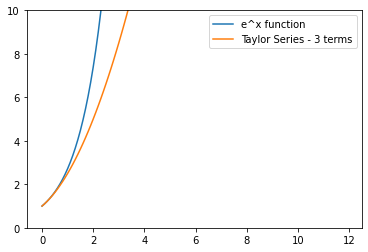

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(0,12,0.1)
for_system = np.exp(angles)
for_taylor = [func_e(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,for_system)
ax.plot(angles,for_taylor)
ax.set_ylim([0,10])
ax.legend(['e^x function','Taylor Series - 3 terms'])

plt.show()

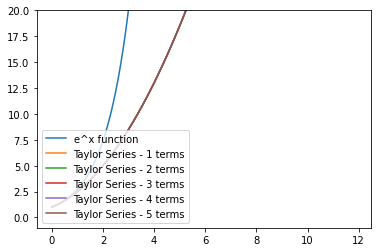

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(0,12,0.1)
for_system = np.exp(angles)

fig, ax = plt.subplots()
ax.plot(angles,for_system)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    for_taylor = [func_e(angle,3) for angle in angles]
    ax.plot(angles,for_taylor)

ax.set_ylim([-1,20])

# set up legend
legend_lst = ['e^x function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

### **sin(x)**

**Code the Taylor Series by writing out each term individually**

In [ ]:
import math

x = 2
sin2 = x**1/math.factorial(1) - x**3/math.factorial(3) + x**5/math.factorial(5) - x**7/math.factorial(7) + x**9/math.factorial(9)
print(e_to_2)

0.909347442680776


In [ ]:

print(math.sin(2))

0.9092974268256817


**Use a for loop to calculate a Taylor Series**

In [ ]:
import math

x = 2
sin2 = 0
for i in range(10):
    sin2 += ((-1)**i)*(x**((i*2)+1)/math.factorial((i*2)+1))
    
print(sin2)

0.909297426825641


In [ ]:
print(math.sin(2))

0.9092974268256817


**Refactor the for loop into a function**

In [ ]:
import math

def func_sin(n):
    x = 2
    sin2 = 0
    for i in range(n):
        sin2+= ((-1)**i)*(x**((i*2)+1)/math.factorial((i*2)+1))
    
    return sin2

In [ ]:
out = func_sin(10)
print(out)

0.909297426825641


In [ ]:
import math

def func_sin_aprox(x, n):
    sin_approx = 0
    for i in range(n):
        sin_approx += ((-1)**i)*(x**((i*2)+1)/math.factorial((i*2)+1))
    
    return sin_approx

In [ ]:

out = func_sin_aprox(2,10)
print(out)

0.909297426825641


**Use a for loop to calculate the difference between the Taylor Series expansion and Python's sin() function**

In [ ]:
import math

x = 2
for i in range(1,11):
    sin_approx = func_sin_aprox(x,i)
    sin_exp = math.sin(x)
    sin_error = abs(sin_approx - sin_exp)
    print(f'{i} terms: Taylor Series approx= {sin_approx}, exp calc= {sin_exp}, error = {sin_error}')

1 terms: Taylor Series approx= 2.0, exp calc= 0.9092974268256817, error = 1.0907025731743183
2 terms: Taylor Series approx= 0.6666666666666667, exp calc= 0.9092974268256817, error = 0.24263076015901497
3 terms: Taylor Series approx= 0.9333333333333333, exp calc= 0.9092974268256817, error = 0.02403590650765164
4 terms: Taylor Series approx= 0.9079365079365079, exp calc= 0.9092974268256817, error = 0.001360918889173779
5 terms: Taylor Series approx= 0.909347442680776, exp calc= 0.9092974268256817, error = 5.001585509434303e-05
6 terms: Taylor Series approx= 0.9092961359628027, exp calc= 0.9092974268256817, error = 1.2908628790331278e-06
7 terms: Taylor Series approx= 0.9092974515196738, exp calc= 0.9092974268256817, error = 2.469399207338796e-08
8 terms: Taylor Series approx= 0.9092974264614476, exp calc= 0.9092974268256817, error = 3.642340873355465e-10
9 terms: Taylor Series approx= 0.909297426829951, exp calc= 0.9092974268256817, error = 4.269251618893577e-12
10 terms: Taylor Series a

**Use a break statement to exit a for loop early**

In [ ]:
import math

x = 2
for i in range(1,20):
    sin_approx = func_sin_aprox(x,i)
    sin_exp = math.sin(x)
    sin_error = abs(sin_approx - sin_exp)
    if sin_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {sin_approx}, exp calc= {sin_exp}, error = {sin_error}')

2 terms: Taylor Series approx= 0.6666666666666667, exp calc= 0.9092974268256817, error = 0.24263076015901497


**Build a plot to compare the Taylor Series approximation to Python's sin() function**

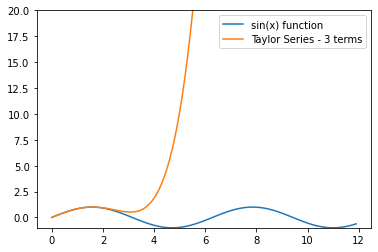

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(0,12,0.1)
for_system = np.sin(angles)
for_taylor = [func_sin_aprox(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,for_system)
ax.plot(angles,for_taylor)
ax.set_ylim([-1,20])
ax.legend(['sin(x) function','Taylor Series - 3 terms'])

plt.show()


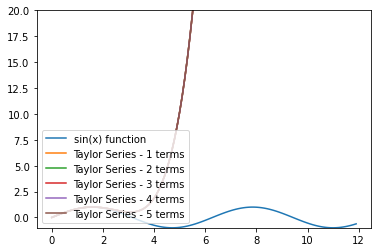

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(0,12,0.1)
for_system = np.sin(angles)

fig, ax = plt.subplots()
ax.plot(angles,for_system)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    for_taylor = [func_sin_aprox(angle,3) for angle in angles]
    ax.plot(angles,for_taylor)

ax.set_ylim([-1,20])

# set up legend
legend_lst = ['sin(x) function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

### **cos(x)**

**Code the Taylor Series by writing out each term individually**

In [ ]:
import math

x = 2
cos2 = x**0/math.factorial(0) - x**2/math.factorial(2) + x**4/math.factorial(4) - x**6/math.factorial(6) + x**8/math.factorial(8)
print(cos2)

-0.41587301587301595


In [ ]:
print(math.cos(2))

-0.4161468365471424


**Use a for loop to calculate a Taylor Series**

In [ ]:
import math

x = 2
cos2 = 0
for i in range(5):
    cos2 += ((-1)**i)*(x**(i*2)/math.factorial(i*2))
    
print(cos2)

-0.41587301587301595


In [ ]:
print(math.cos(2))

-0.4161468365471424


**Refactor the for loop into a function**

In [ ]:
import math

def func_cos(n):
    x = 2
    cos2 = 0
    for i in range(n):
        cos2 += ((-1)**i)*(x**(i*2)/math.factorial(i*2))
    
    return cos2

In [ ]:
out = func_cos(10)
print(out)

-0.41614683654756973


In [ ]:
import math

def func_cos_aporx(x, n):
    cos_approx = 0
    for i in range(n):
        cos_approx += ((-1)**i)*((x**(i*2))/math.factorial(i*2))
    
    return cos_approx

In [ ]:
out = func_cos_aporx(2,10)
print(out)

-0.41614683654756973


**Use a for loop to calculate the difference between the Taylor Series expansion and Python's cos() function**

In [ ]:
import math

x = 2
for i in range(1,11):
    cos_approx = func_cos_aporx(x,i)
    cos_exp = math.cos(x)
    cos_error = abs(cos_approx - cos_exp)
    print(f'{i} terms: Taylor Series approx= {cos_approx}, exp calc= {cos_exp}, error = {cos_error}')

1 terms: Taylor Series approx= 1.0, exp calc= -0.4161468365471424, error = 1.4161468365471424
2 terms: Taylor Series approx= -1.0, exp calc= -0.4161468365471424, error = 0.5838531634528576
3 terms: Taylor Series approx= -0.33333333333333337, exp calc= -0.4161468365471424, error = 0.08281350321380904
4 terms: Taylor Series approx= -0.4222222222222223, exp calc= -0.4161468365471424, error = 0.00607538567507987
5 terms: Taylor Series approx= -0.41587301587301595, exp calc= -0.4161468365471424, error = 0.00027382067412645705
6 terms: Taylor Series approx= -0.4161552028218696, exp calc= -0.4161468365471424, error = 8.366274727167333e-06
7 terms: Taylor Series approx= -0.4161466517022073, exp calc= -0.4161468365471424, error = 1.8484493508053035e-07
8 terms: Taylor Series approx= -0.4161468396389032, exp calc= -0.4161468365471424, error = 3.0917607918290457e-09
9 terms: Taylor Series approx= -0.41614683650662493, exp calc= -0.4161468365471424, error = 4.0517478261392625e-11
10 terms: Taylor 

**Use a break statement to exit a for loop early.**

In [ ]:
import math

x = 2
for i in range(1,20):
    cos_approx = func_cos_aporx(x,i)
    cos_exp = math.cos(x)
    cos_error = abs(cos_approx - cos_exp)
    if cos_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {cos_approx}, exp calc= {cos_exp}, error = {cos_error}')

2 terms: Taylor Series approx= -1.0, exp calc= -0.4161468365471424, error = 0.5838531634528576


**Build a plot to compare the Taylor Series approximation to Python's cos() function**

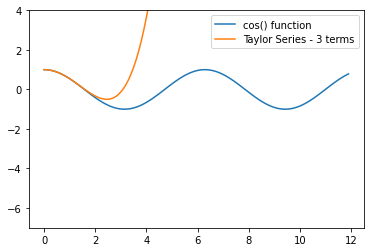

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(0,12,0.1)
for_system = np.cos(angles)
for_taylor = [func_cos_aporx(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,for_system)
ax.plot(angles,for_taylor)
ax.set_ylim([-7,4])
ax.legend(['cos() function','Taylor Series - 3 terms'])

plt.show()

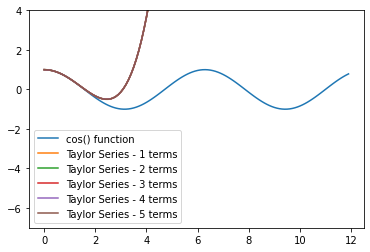

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(0,12,0.1)
for_system = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,for_system)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    for_taylor = [func_cos_aporx(angle,3) for angle in angles]
    ax.plot(angles,for_taylor)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

### **(1/(1-x))**

In [ ]:
def div(x):
  return (1/(1-x))

**Code the Taylor Series by writing out each term individually**

In [ ]:


x = 0.1
div2 = x**0 + x**1 + x**2 + x**3 + x**4
print(div2)

1.1111


In [ ]:
print(div(0.1))

1.1111111111111112


**Use a for loop to calculate a Taylor Series**

In [ ]:


x = 0.1
div2 = 0
for i in range(5):
    div2 += x**i
    
print(div2)

1.1111


In [ ]:
print(div(2))

-1.0


**Refactor the for loop into a function**

In [ ]:
def func_div(n):
    x = 0.1
    div2 = 0
    for i in range(n):
        div2 += x**i
    
    return div2

In [ ]:

out = func_div(10)
print(out)

1.111111111


In [ ]:
def func_div2(x, n):
    div_approx = 0
    for i in range(n):
        div_approx += x**i
    
    return div_approx

In [ ]:
out = func_div2(0.1,10)
print(out)

1.111111111


**Use a for loop to calculate the difference between the Taylor Series expansion and Geometric series function**

In [ ]:
x = 0.1
for i in range(1,11):
    div_approx = func_div2(x,i)
    div_exp = div(x)
    div_error = abs(div_approx - div_exp)
    print(f'{i} terms: Taylor Series approx= {div_approx}, exp calc= {div_exp}, error = {div_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 1.1111111111111112, error = 0.11111111111111116
2 terms: Taylor Series approx= 1.1, exp calc= 1.1111111111111112, error = 0.011111111111111072
3 terms: Taylor Series approx= 1.11, exp calc= 1.1111111111111112, error = 0.0011111111111110628
4 terms: Taylor Series approx= 1.111, exp calc= 1.1111111111111112, error = 0.00011111111111117289
5 terms: Taylor Series approx= 1.1111, exp calc= 1.1111111111111112, error = 1.1111111111183902e-05
6 terms: Taylor Series approx= 1.11111, exp calc= 1.1111111111111112, error = 1.1111111111183902e-06
7 terms: Taylor Series approx= 1.111111, exp calc= 1.1111111111111112, error = 1.1111111120065686e-07
8 terms: Taylor Series approx= 1.1111111, exp calc= 1.1111111111111112, error = 1.1111111142270147e-08
9 terms: Taylor Series approx= 1.11111111, exp calc= 1.1111111111111112, error = 1.1111112030448567e-09
10 terms: Taylor Series approx= 1.111111111, exp calc= 1.1111111111111112, error = 1.1111112030448567e-10

**Use a break statement to exit a for loop early.**

In [ ]:
x = 0.1
for i in range(1,20):
    div_approx = func_div2(x,i)
    div_exp = div(x)
    div_error = abs(div_approx - div_exp)
    if e_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {div_approx}, exp calc= {div_exp}, error = {div_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 1.1111111111111112, error = 0.11111111111111116


**Build a plot to compare the Taylor Series approximation to Geometric series function**

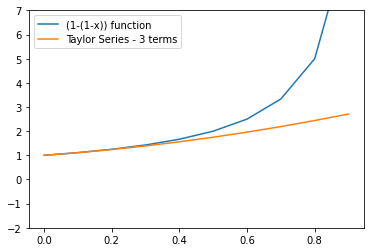

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(0,1,0.1)
for_system = div(angles)
for_taylor = [func_div2(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,for_system)
ax.plot(angles,for_taylor)
ax.set_ylim([-2,7])
ax.legend(['(1-(1-x)) function','Taylor Series - 3 terms'])

plt.show()

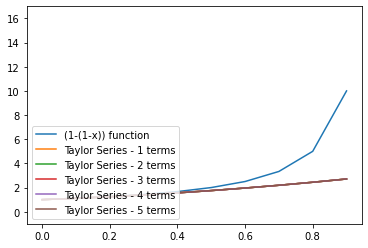

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(0,1,0.1)
for_system = div(angles)

fig, ax = plt.subplots()
ax.plot(angles,for_system)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    for_taylor = [func_div2(angle,3) for angle in angles]
    ax.plot(angles,for_taylor)

ax.set_ylim([-1,17])

# set up legend
legend_lst = ['(1-(1-x)) function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

### **ln(1+x)**

In [1]:
import math
def log_1x(x):
  o = 1+x
  return math.log(o)

**Code the Taylor Series by writing out each term individually**

In [2]:
import math

x = 0.1
log2 = x**1/1 - x**2/2 + x**3/3 - x**4/4 + x**5/5
print(log2)


0.09531033333333334


In [3]:
print(math.log(1+0.1))

0.09531017980432493


**Use a for loop to calculate a Taylor Series**

In [4]:
import math

x = 0.1
log2 = 0
for i in range(5):
    log2 += -((-1)**(i+1))*(x**(i+1)/(i+1))
    
print(log2)

0.09531033333333334


In [5]:
print(math.log(1+0.1))

0.09531017980432493


**Refactor the for loop into a function**

In [6]:
import math

def logaritmo(n):
    x = 0.1
    log2 = 0
    for i in range(n):
        log2 += -((-1)**(i+1))*(x**(i+1)/(i+1))
    
    return log2

In [7]:
out = logaritmo(10)
print(out)

0.09531017980349207


In [8]:
import math

def logaritmo2(x, n):
    log_approx = 0
    for i in range(n):
        log_approx += -((-1)**(i+1))*(x**(i+1)/(i+1))
    
    return log_approx

In [9]:
out = logaritmo2(0.1,10)
print(out)

0.09531017980349207


**Use a for loop to calculate the difference between the Taylor Series expansion and ln(1+x) function**

In [10]:
import math

x = 0.1
for i in range(1,11):
    log_approx = logaritmo2(x,i)
    log_exp = log_1x(x)
    log_error = abs(log_approx - log_exp)
    print(f'{i} terms: Taylor Series approx= {log_approx}, exp calc= {log_exp}, error = {log_error}')

1 terms: Taylor Series approx= 0.1, exp calc= 0.09531017980432493, error = 0.004689820195675071
2 terms: Taylor Series approx= 0.095, exp calc= 0.09531017980432493, error = 0.00031017980432493375
3 terms: Taylor Series approx= 0.09533333333333334, exp calc= 0.09531017980432493, error = 2.3153529008404505e-05
4 terms: Taylor Series approx= 0.09530833333333334, exp calc= 0.09531017980432493, error = 1.8464709915927413e-06
5 terms: Taylor Series approx= 0.09531033333333334, exp calc= 0.09531017980432493, error = 1.5352900840925887e-07
6 terms: Taylor Series approx= 0.09531016666666668, exp calc= 0.09531017980432493, error = 1.3137658252948547e-08
7 terms: Taylor Series approx= 0.09531018095238097, exp calc= 0.09531017980432493, error = 1.1480560391241568e-09
8 terms: Taylor Series approx= 0.09531017970238097, exp calc= 0.09531017980432493, error = 1.0194396715679233e-10
9 terms: Taylor Series approx= 0.09531017981349207, exp calc= 0.09531017980432493, error = 9.167139269905533e-12
10 term

**Use a break statement to exit a for loop early.**

In [11]:
import math

x = 0.1
for i in range(1,20):
    log_approx = logaritmo2(x,i)
    log_exp = log_1x(x)
    log_error = abs(log_approx - log_exp)
    if log_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {log_approx}, exp calc= {log_exp}, error = {log_error}')

1 terms: Taylor Series approx= 0.1, exp calc= 0.09531017980432493, error = 0.004689820195675071


**Build a plot to compare the Taylor Series approximation to ln(1+x) function**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


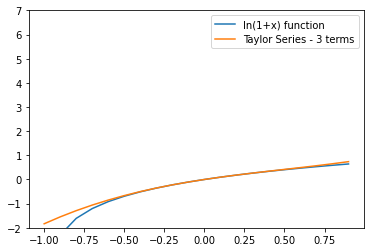

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(-1,1,0.1)
for_system = np.log(angles+1)
for_taylor = [logaritmo2(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,for_system)
ax.plot(angles,for_taylor)
ax.set_ylim([-2,7])
ax.legend(['ln(1+x) function','Taylor Series - 3 terms'])

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


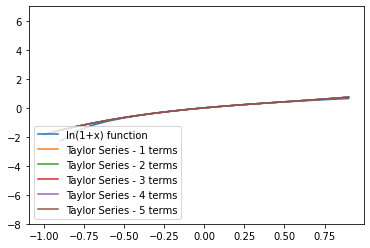

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(-1,1,0.1)
for_system = np.log(angles+1)

fig, ax = plt.subplots()
ax.plot(angles,for_system)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    for_taylor = [logaritmo2(angle,3) for angle in angles]
    ax.plot(angles,for_taylor)

ax.set_ylim([-8,7])

# set up legend
legend_lst = ['ln(1+x) function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

### **ln(x)**

**Code the Taylor Series by writing out each term individually**

In [31]:
import math

x = 2
l_natural = (x-1)**1/1 - (x-1)**2/2 + (x-1)**3/3 - (x-1)**4/4 + (x-1)**5/5
print(l_natural)

0.7833333333333332


In [33]:
print(math.log(2))

0.6931471805599453


**Use a for loop to calculate a Taylor Series**

In [34]:
import math

x = 2
l_natural = 0
for i in range(10):
    l_natural += ((-1)**i)*((x-1)**(i+1)/(i+1))
    
print(l_natural)

0.6456349206349207


In [35]:
print(math.log(2))

0.6931471805599453


**Refactor the for loop into a function**

In [36]:
import math

def l_n(n):
    x = 2
    l_natural = 0
    for i in range(n):
        l_natural += ((-1)**i)*((x-1)**(i+1)/(i+1))
    
    return l_natural

In [37]:
out = l_n(10)
print(out)

0.6456349206349207


In [38]:
import math

def l_n_2(x, n):
    l_natural = 0
    for i in range(n):
        l_natural += ((-1)**i)*((x-1)**(i+1)/(i+1))
    
    return l_natural

In [39]:
out = l_n_2(2,10)
print(out)

0.6456349206349207


**Use a for loop to calculate the difference between the Taylor Series expansion and Python's log() function**

In [40]:
import math

x = 2
for i in range(1,11):
    l_approx = l_n_2(x,i)
    l_exp = math.log(x)
    l_error = abs(l_approx - l_exp)
    print(f'{i} terms: Taylor Series approx= {l_approx}, exp calc= {l_exp}, error = {l_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 0.6931471805599453, error = 0.3068528194400547
2 terms: Taylor Series approx= 0.5, exp calc= 0.6931471805599453, error = 0.1931471805599453
3 terms: Taylor Series approx= 0.8333333333333333, exp calc= 0.6931471805599453, error = 0.14018615277338797
4 terms: Taylor Series approx= 0.5833333333333333, exp calc= 0.6931471805599453, error = 0.10981384722661203
5 terms: Taylor Series approx= 0.7833333333333332, exp calc= 0.6931471805599453, error = 0.09018615277338793
6 terms: Taylor Series approx= 0.6166666666666666, exp calc= 0.6931471805599453, error = 0.0764805138932787
7 terms: Taylor Series approx= 0.7595238095238095, exp calc= 0.6931471805599453, error = 0.0663766289638642
8 terms: Taylor Series approx= 0.6345238095238095, exp calc= 0.6931471805599453, error = 0.058623371036135796
9 terms: Taylor Series approx= 0.7456349206349207, exp calc= 0.6931471805599453, error = 0.052487740074975364
10 terms: Taylor Series approx= 0.6456349206349207,

**Use a break statement to exit a for loop early**

In [41]:
import math

x = 2
for i in range(1,20):
    l_approx = l_n_2(x,i)
    l_exp = math.log(x)
    l_error = abs(l_approx - l_exp)
    if l_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {l_approx}, exp calc= {l_exp}, error = {l_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 0.6931471805599453, error = 0.3068528194400547


**Build a plot to compare the Taylor Series approximation to Python's log() function**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


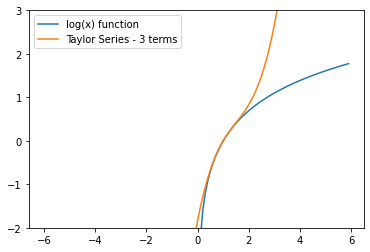

In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(-6,6,0.1)
for_system = np.log(angles)
for_taylor = [l_n_2(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,for_system)
ax.plot(angles,for_taylor)
ax.set_ylim([-2,3])
ax.legend(['log(x) function','Taylor Series - 3 terms'])

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


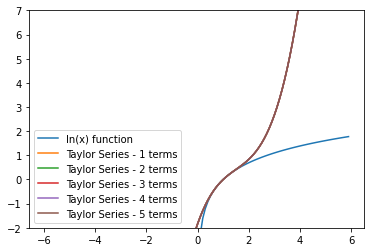

In [49]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.arange(-6,6,0.1)
for_system = np.log(angles)

fig, ax = plt.subplots()
ax.plot(angles,for_system)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    for_taylor = [l_n_2(angle,3) for angle in angles]
    ax.plot(angles,for_taylor)

ax.set_ylim([-2,7])

# set up legend
legend_lst = ['ln(x) function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

## **Taylor Series Expansion with Python**

### **e^x**

In [50]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [51]:
# Define symbol
x = Symbol('x')

In [53]:
def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [61]:
print('e(x) =', taylor(exp(x), 0, 10))

e(x) = x**9/362880 + x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


In [69]:
print('e(1) =', taylor(exp(x), 0, 4).subs(x,1))

e(1) = 8/3


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


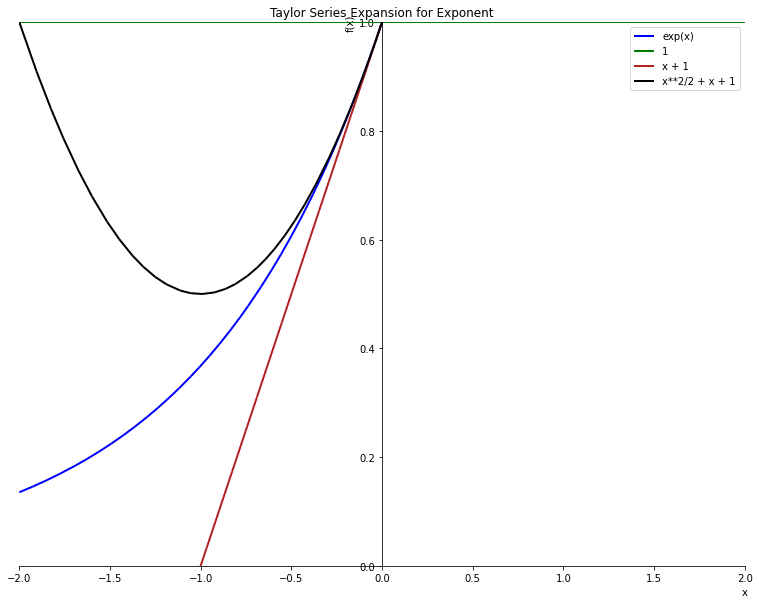

In [64]:
# This will plot exponent and its Taylor approximations

p = plot(exp(x),taylor(exp(x),0,1),taylor(exp(x),0,2),taylor(exp(x),0,3),
         (x,-2,2),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Exponent'
p.show()

### **sin(x)**

In [65]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [66]:
# Define symbol
x = Symbol('x')

In [67]:
def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [68]:
print('sin(x) =', taylor(sin(x), 0, 4))

sin(x) = -x**3/6 + x


In [70]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

sin(1) = 5/6


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


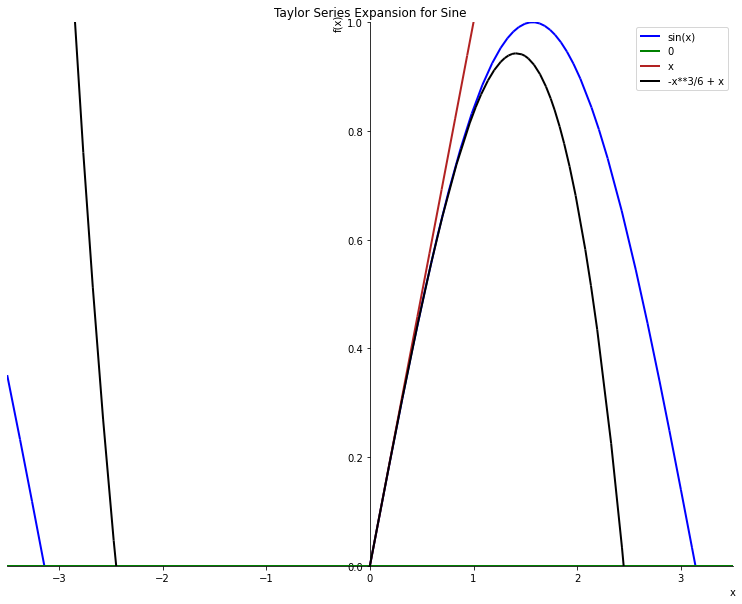

In [71]:
p = plot(sin(x),taylor(sin(x),0,1),taylor(sin(x),0,3),taylor(sin(x),0,5),
         (x,-3.5,3.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Sine'
p.show()

### **cos(x)**

In [72]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [73]:
# Define symbol
x = Symbol('x')

In [74]:
def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [83]:
print('cos(x) =', taylor(cos(x), 0, 4))

cos(x) = -x**2/2 + 1


In [84]:
print('cos(1) =', taylor(cos(x), 0, 4).subs(x,1))

cos(1) = 1/2


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


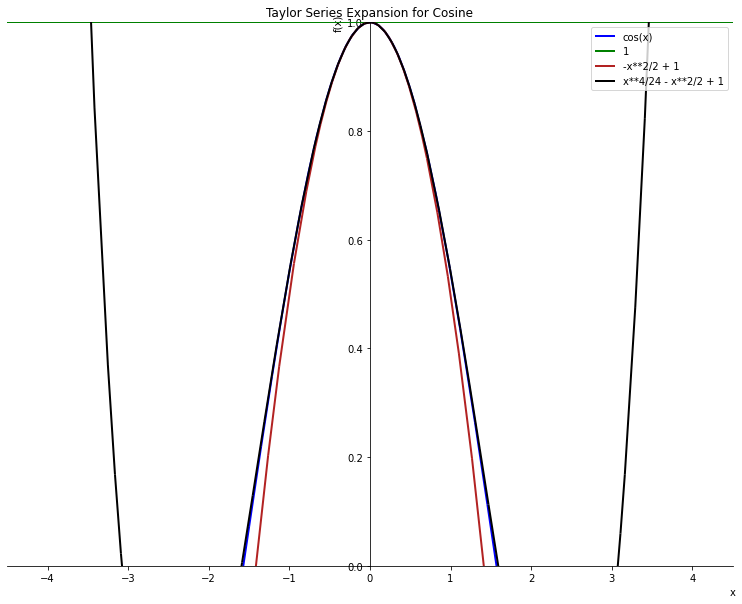

In [86]:
p = plot(cos(x),taylor(cos(x),0,2),taylor(cos(x),0,4),taylor(cos(x),0,6),
         (x,-4.5,4.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Cosine'
p.show()

### **1/(1-x)**

In [87]:
from sympy import series, Symbol
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [88]:
# Define symbol
x = Symbol('x')

In [89]:
def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [90]:
print('1/(1-x) =', taylor(1/(1-x), 0, 4))

1/(1-x) = x**3 + x**2 + x + 1


In [91]:
print('1/(1-x) =', taylor(1/(1-x), 0, 4).subs(x, 0.1))

1/(1-x) = 1.11100000000000


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


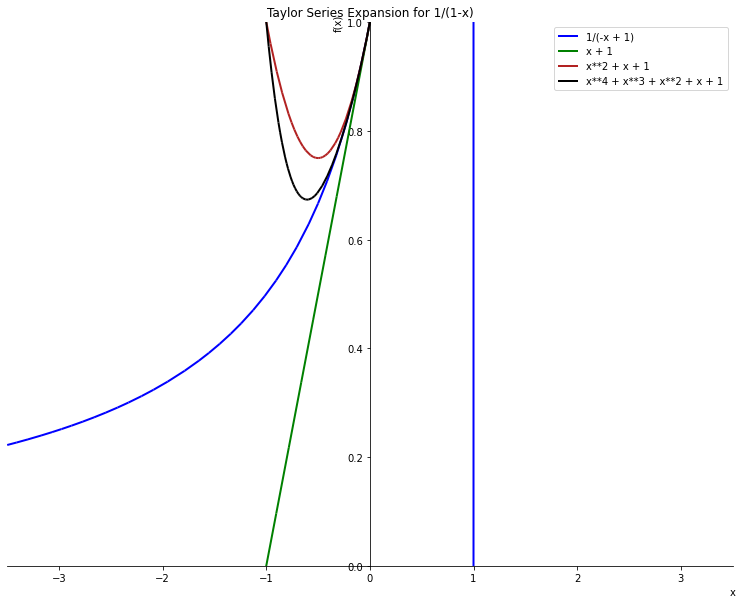

In [114]:
p = plot(1/(1-x),taylor(1/(1-x),0,2),taylor(1/(1-x),0,3),taylor(1/(1-x),0,5),
         (x,-3.5,3.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for 1/(1-x)'
p.show()

### **ln(x+1)**

In [93]:
from sympy import series, Symbol
from sympy.functions import log
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [94]:
# Define symbol
x = Symbol('x')

In [95]:
def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [96]:
print('ln(x+1) =', taylor(log(x+1), 0, 4))

ln(x+1) = x**3/3 - x**2/2 + x


In [97]:
print('ln(x+1) =', taylor(log(x+1), 0, 4).subs(x,1))

ln(x+1) = 5/6


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


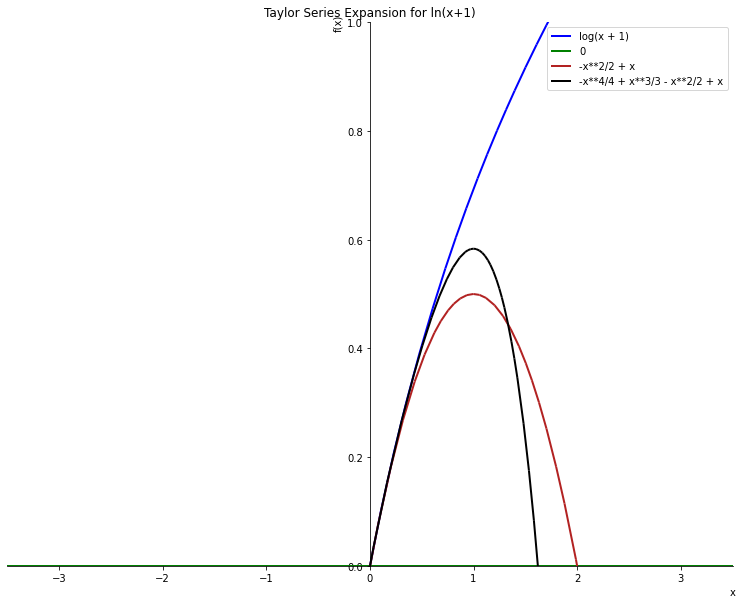

In [113]:
p = plot(log(x+1),taylor(log(x+1),0,1),taylor(log(x+1),0,3),taylor(log(x+1),0,5),
         (x,-3.5,3.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for ln(x+1)'
p.show()

### **ln(x)**

In [99]:
from sympy import series, Symbol
from sympy.functions import log
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [100]:
# Define symbol
x = Symbol('x')

In [105]:
def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [108]:
print('ln(x) =', taylor(log(x), 1,4))

ln(x) = x + (x - 1)**3/3 - (x - 1)**2/2 - 1


In [110]:
print('ln(x) =', taylor(log(x), 1,4).subs(x,2))

ln(x) = 5/6


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


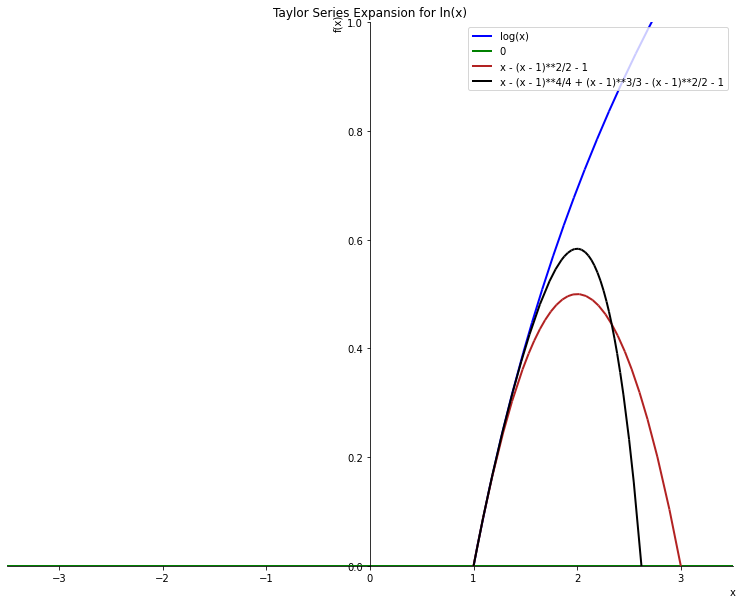

In [112]:
p = plot(log(x),taylor(log(x),1,1),taylor(log(x),1,3),taylor(log(x),1,5),
         (x,-3.5,3.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for ln(x)'
p.show()